<a href="https://colab.research.google.com/github/abrahamfullstack/EDA-Projects/blob/main/World_University_Rankings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**World University Rankings**

1.   What countries are the top universities in?
2.   What are the main factors that determine one’s world ranking?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('timesData.csv')

In [ ]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,"7,929",8.4,27%,45:55:00,2011


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 1 to 1200
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              1077 non-null   int64  
 1   university_name         1077 non-null   object 
 2   country                 1077 non-null   object 
 3   teaching                1077 non-null   float64
 4   international           1077 non-null   float64
 5   research                1077 non-null   float64
 6   citations               1077 non-null   float64
 7   income                  1077 non-null   float64
 8   total_score             1077 non-null   float64
 9   num_students            1077 non-null   object 
 10  student_staff_ratio     1077 non-null   float64
 11  international_students  1077 non-null   object 
 12  female_male_ratio       1077 non-null   object 
 13  year                    1077 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memor

**What countries are the top universities in?**

Show them as pivot/group for the last year registered

In [ ]:
group1 = df[df['year'] == df['year'].max()].groupby(['year', 'university_name'])['world_rank'].sum()
group1.sort_values(ascending=True)

year  university_name                      
2016  California Institute of Technology         1
      University of Oxford                       2
      Stanford University                        3
      University of Cambridge                    4
      Massachusetts Institute of Technology      5
                                              ... 
      St George’s, University of London        196
      Newcastle University                     196
      University of Trento                     198
      Paris Diderot University – Paris 7       199
      Queen’s University Belfast               200
Name: world_rank, Length: 181, dtype: int64

Show them as bar plot for the last year registered

<BarContainer object of 5 artists>

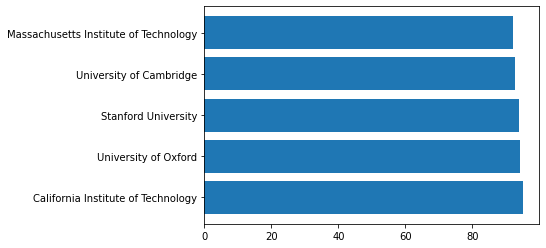

In [ ]:
plotData = df[df['year'] == df['year'].max()]
plotData = plotData.sort_values(by='total_score', ascending=False)
yData = plotData['university_name']
xData = plotData['total_score']
plt.barh(y=yData[:5], width=xData[:5])

**What are the main factors that determine one’s world ranking?**

Select the features to test

In [ ]:
features = [
            'teaching',
            'international',
            'research',
            'citations',
            'income'
]

Use numpy corrcoef to calculate the Pearson correlation coefficient.
Then plot the features with the results

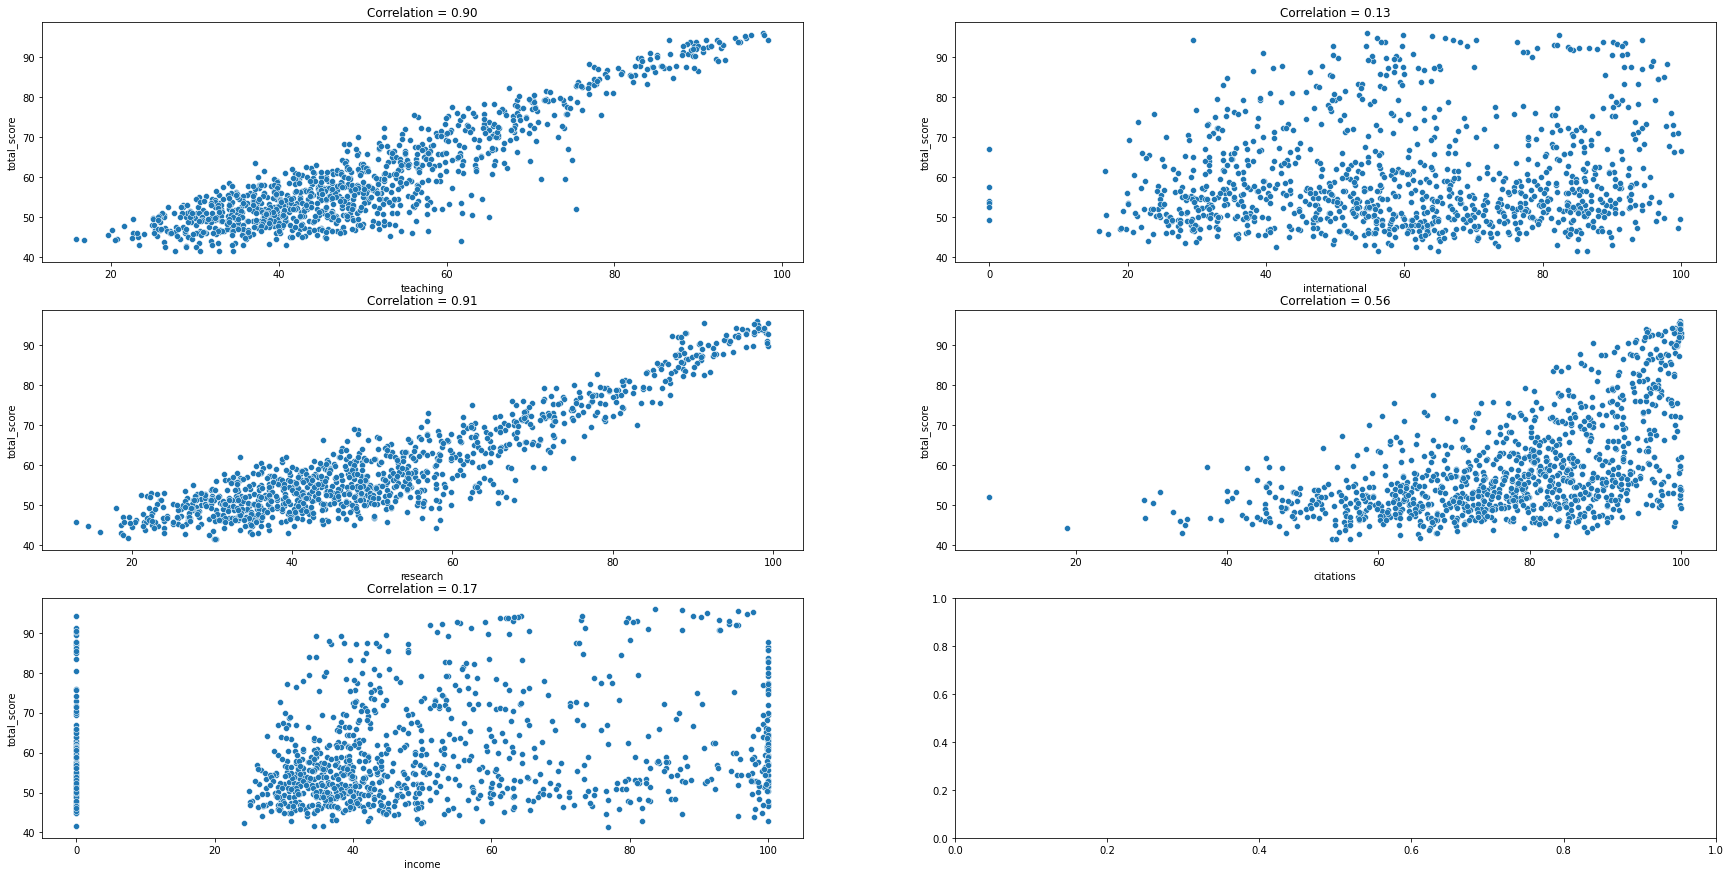

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))

for feature, subplot in zip(features, axes.flatten()):

  # check pearson coeffiten
  rho = np.corrcoef(df[feature], df['total_score'])

  sns.scatterplot(data=df, x=feature, y='total_score', ax=subplot)
  subplot.title.set_text('Correlation = ' + '{:.2f}'.format(rho[0,1]))

Given these result, we can consider the following two feaures to be correlated to the Total Score:

Teaching & Research